<h1><center> Récupérer et connaître vos données </center></h1>


## Étape 1. Importez les bibliothèques nécessaires

In [1]:
import pandas as pd

## Étape 2. Importez le jeux de données à partir de:

https://drive.google.com/file/d/1MDE8S6LNNOKRjE6jcpJw45x70rwNZzAP/view?usp=sharing



## Étape 3. Attribuez-le à une variable appelée data.

In [2]:
url = "https://drive.google.com/file/d/1MDE8S6LNNOKRjE6jcpJw45x70rwNZzAP/view?usp=sharing"
url ='https://drive.google.com/uc?id=' + url.split('/')[-2]
#url = "data.tsv"
data=pd.read_csv(url, sep='\t')

## Étape 4. Voir les 10 premières entrées

In [4]:
data.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


## Étape 5. Quel est le nombre d'observations dans le jeux de données?

In [5]:
data.count()

order_id              4622
quantity              4622
item_name             4622
choice_description    3376
item_price            4622
dtype: int64

## Étape 6. Quel est le nombre de colonnes dans le jeux de données?

In [6]:
len(data.columns)

5

## Étape 7. Afficher le nom de toutes les colonnes.

In [7]:
for col in data.columns:
    print(col)

order_id
quantity
item_name
choice_description
item_price


## Étape 8. Comment le jeux de données est-il indexé?

In [8]:
# order_id + item_name ?
data.index

RangeIndex(start=0, stop=4622, step=1)

## Étape 9. Quel est l'article le plus commandé? Pour l'article le plus commandé, combien d'articles ont été commandés?

data.max() :  order_id                   1834
quantity                     15
item_name     Veggie Soft Tacos
item_price               $9.39 
dtype: object
value_counts() :  Chicken Bowl    726
Name: item_name, dtype: int64
<class 'pandas.core.frame.DataFrame'>
quantity                                1   2   3   4   5   7   8   10  15
item_name                                                                 
6 Pack Soft Drink                       53   1   0   0   0   0   0   0   0
Barbacoa Bowl                           66   0   0   0   0   0   0   0   0
Barbacoa Burrito                        91   0   0   0   0   0   0   0   0
Barbacoa Crispy Tacos                   10   1   0   0   0   0   0   0   0
Barbacoa Salad Bowl                     10   0   0   0   0   0   0   0   0
Barbacoa Soft Tacos                     25   0   0   0   0   0   0   0   0
Bottled Water                          139  12   6   2   1   1   0   1   0
Bowl                                     1   0   1   0   0   0 

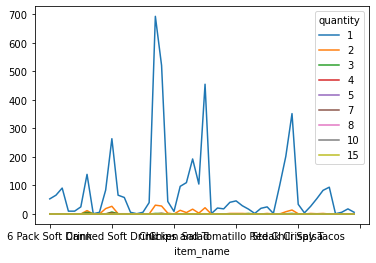

In [76]:
print("data.max() : ", data.max())
print("value_counts() : ", data.item_name.value_counts().head(1))

pd.crosstab(data.item_name, data.quantity).

print(pd.crosstab(data.item_name, data.quantity))

pd.crosstab(data.item_name, data.quantity).plot()


## Étape 10. Quel était l'article le plus commandé dans la colonne choice_description?

In [55]:
data.choice_description.value_counts().head(1)

[Diet Coke]    134
Name: choice_description, dtype: int64

## Étape 11. Combien d'articles ont été commandés au total?

In [9]:
data.quantity.sum()

4972

## Étape 12. Transformez le prix de l'article en flottant

### Étape 12.a Vérifiez le type de la variable item_price

In [86]:
print(type(data.item_price))
print(data.item_price.dtype)
print(data.item_price.apply(type).value_counts())

df = data
df.item_price = df.item_price.str.replace(',','').str.replace('$','').astype('float')

<class 'pandas.core.series.Series'>
object
<class 'str'>    4622
Name: item_price, dtype: int64


### Étape 12.b Créer une fonction lambda et modifier le type de item_price en float

In [10]:
floater = lambda x: float(x[1:-1])
data.item_price = data.item_price.apply(floater)

### Étape 12.c Vérifiez le type de la variable item_price

In [87]:
print(type(df.item_price))
print(df.item_price.dtype)
print(df.item_price.apply(type).value_counts())


<class 'pandas.core.series.Series'>
float64
<class 'float'>    4622
Name: item_price, dtype: int64


## Étape 13. Quel est le chiffre d'affaires pour la période dans le jeux de données?

In [12]:
print((data['quantity']* data['item_price']).sum())
# En conssidérant que les Series sont déjà sommées :
print(data.item_price.sum())


39237.02
34500.16


## Étape 14. Combien de commandes ont été passées au cours de la période?

In [90]:
len(data.order_id.unique())

1834

## Étape 15. Quel est le montant moyen des revenus par commande?

In [17]:


data.groupby(by=['order_id']).sum().mean()['revenue']

KeyError: 'ca'

## Étape 16. Combien d'articles différents sont vendus?

In [91]:
len(data.item_name.unique())

50